# Squats from Excel

In [41]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.integrate import cumulative_trapezoid

In [42]:
unityDF = pd.read_csv("unitydata (1).csv")
originalUnityDF = unityDF.copy()

In [43]:

i = 0
while(i < 20):
    unityDF.drop(index=i, inplace=True)
    i = i+1
unityDF = unityDF.reset_index()
    

In [44]:
unityDF = unityDF.reset_index()
unityDF.drop(columns=['index', 'level_0'], inplace=True)
unityDF.head()

,time,force
0,3.34,834.79
1,3.50,834.52
2,3.66,834.69
3,3.82,834.80
4,3.98,834.63


In [45]:
X = unityDF.loc[0]
print(f"Time removed from each 'time' value: {X['time']}")

def removeXtime(time):
    return time-X

unityDF['time'] = unityDF['time'].map(lambda x: (x-X)['time'])
unityDF.head()


Time removed from each 'time' value: 3.34


,time,force
0,0.00,834.79
1,0.16,834.52
2,0.32,834.69
3,0.48,834.80
4,0.64,834.63


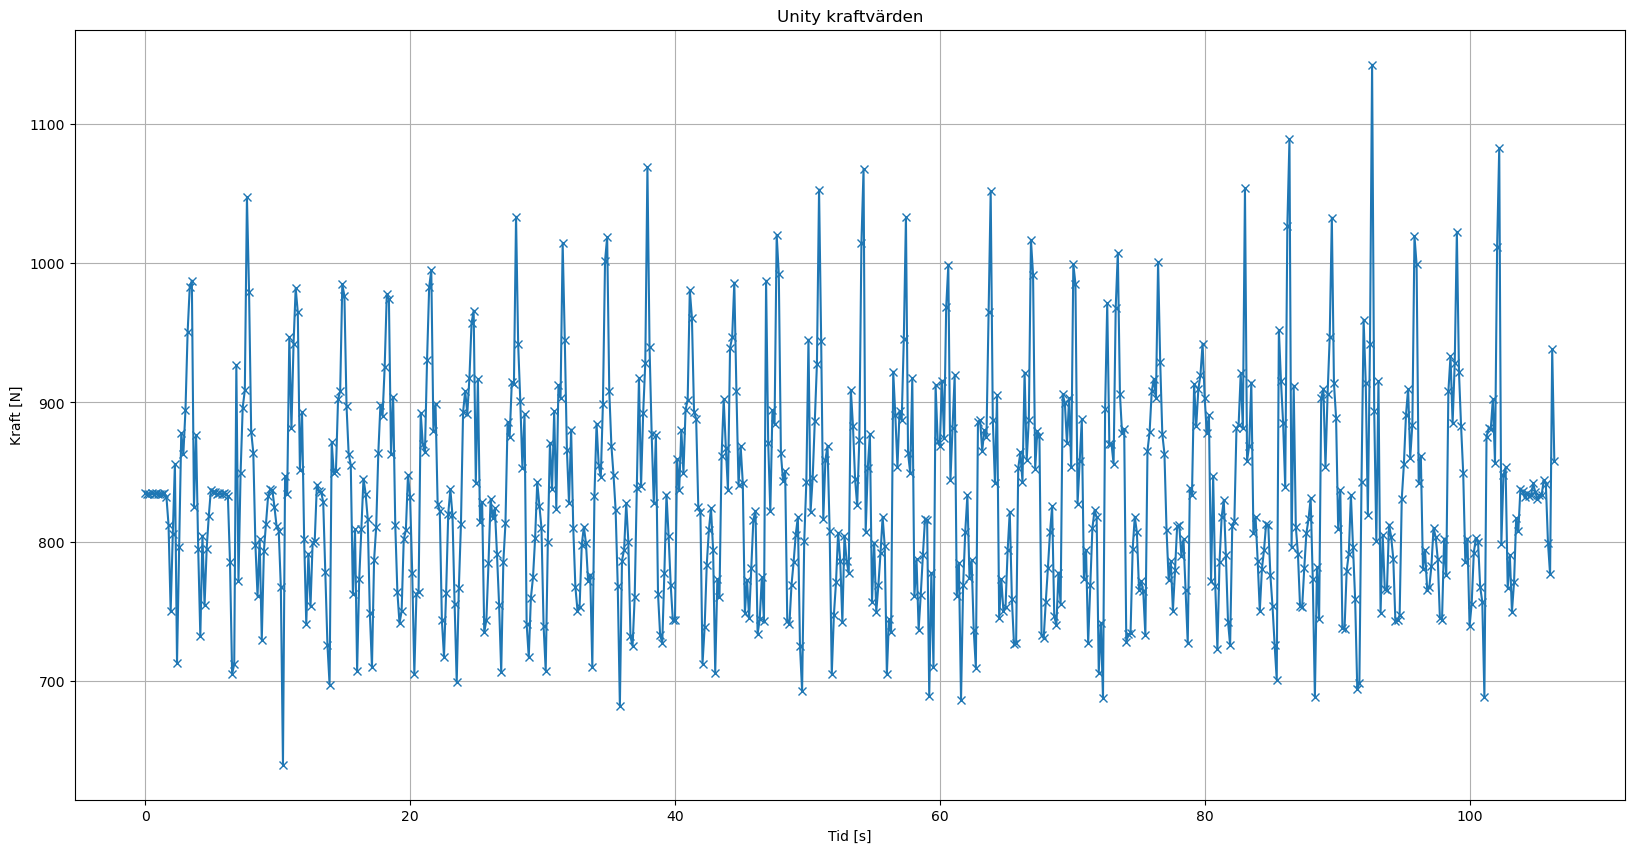

In [46]:

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(unityDF['time'], unityDF['force'], marker="x")
#ax.plot(originalUnityDF['time'], originalUnityDF['force'], linestyle='dashed', color = "green")
ax.set_xlabel("Tid [s]")
ax.set_ylabel("Kraft [N]")
plt.title("Unity kraftvärden")
plt.grid(True)

plt.show()

Möjligtvis inttresant [[Källa]](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html)

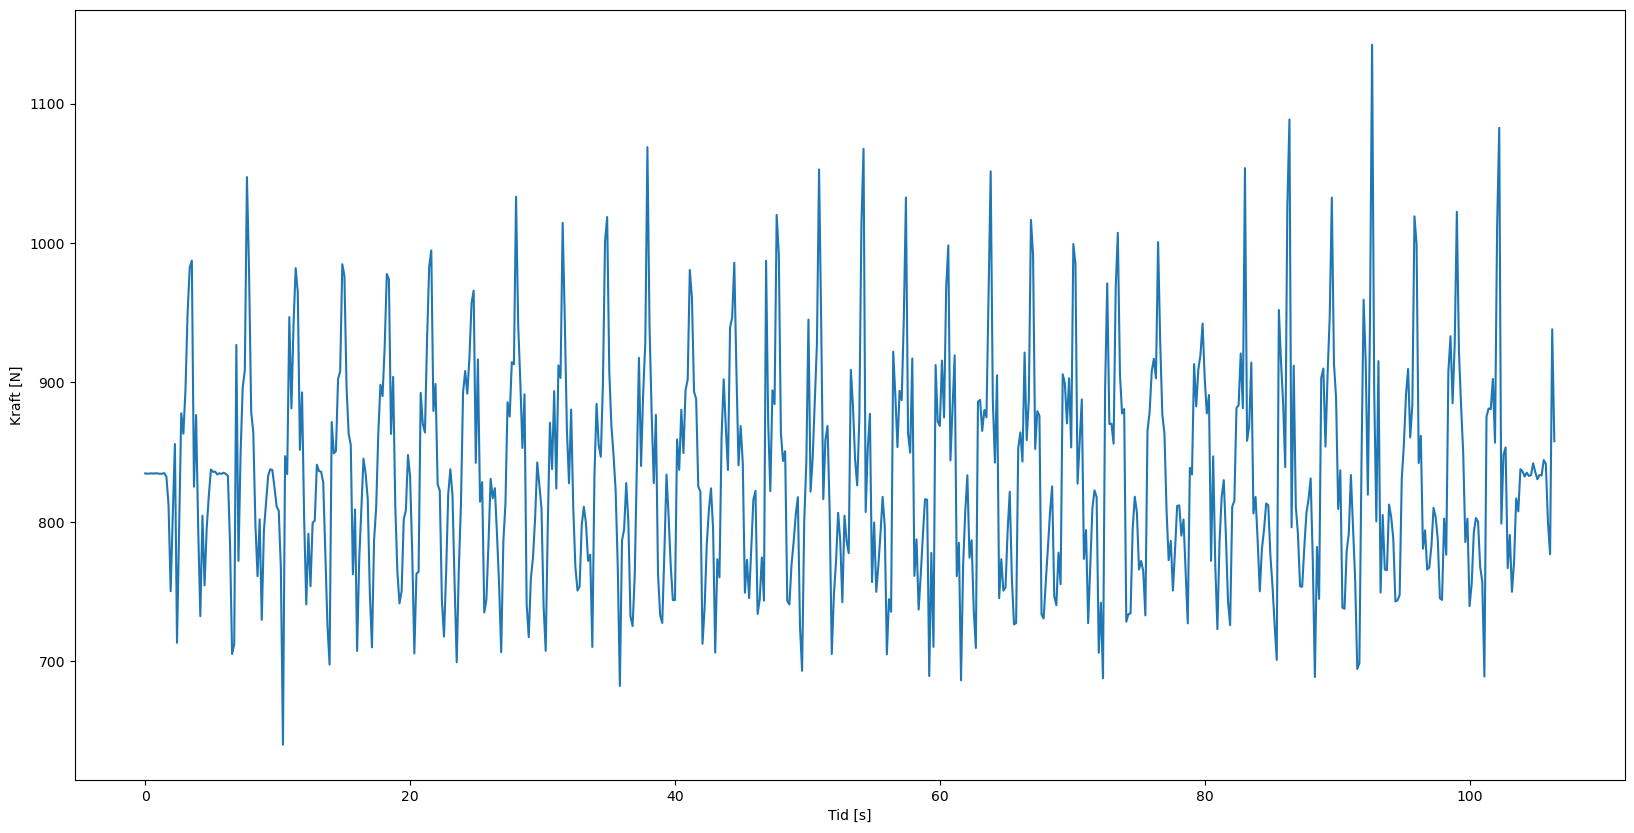

In [47]:

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(unityDF['time'], unityDF['force'])
ax.set_xlabel("Tid [s]")
ax.set_ylabel("Kraft [N]")
plt.show()

#plt.plot(data['time'], data['force'])
#plt.figure().set_size_inches(2000, 10, forward=True)
#plt.show()

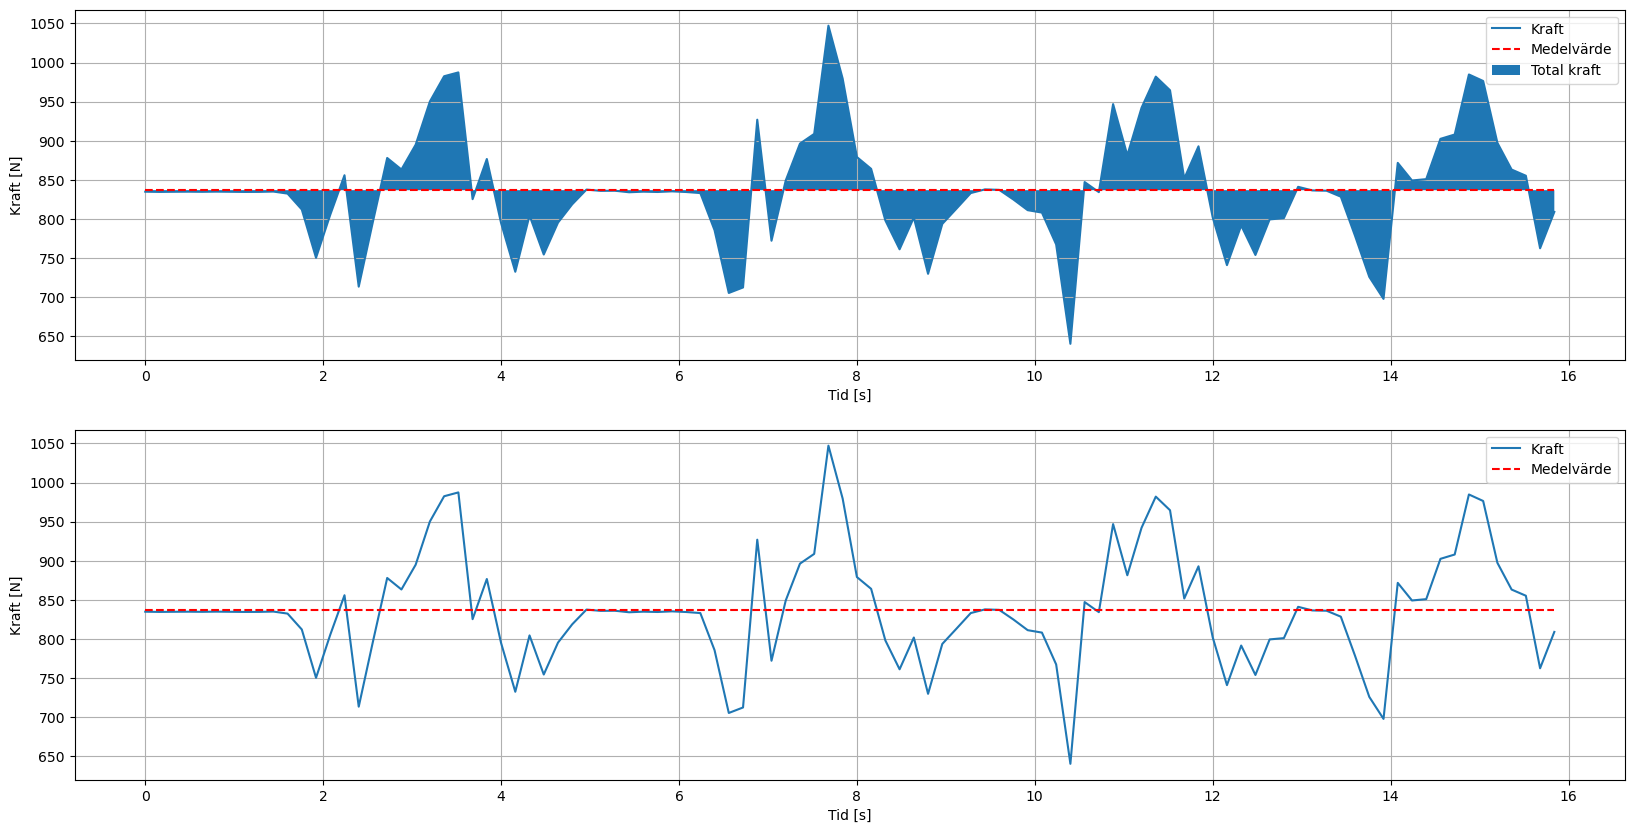

In [48]:

snippetOfGraph = unityDF[0:100]
horizontalLine = np.arange(0, snippetOfGraph.shape[0])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft")
ax1.legend()
ax1.grid()

ax2.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax2.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Kraft [N]")
ax2.legend()
ax2.grid()
plt.show()

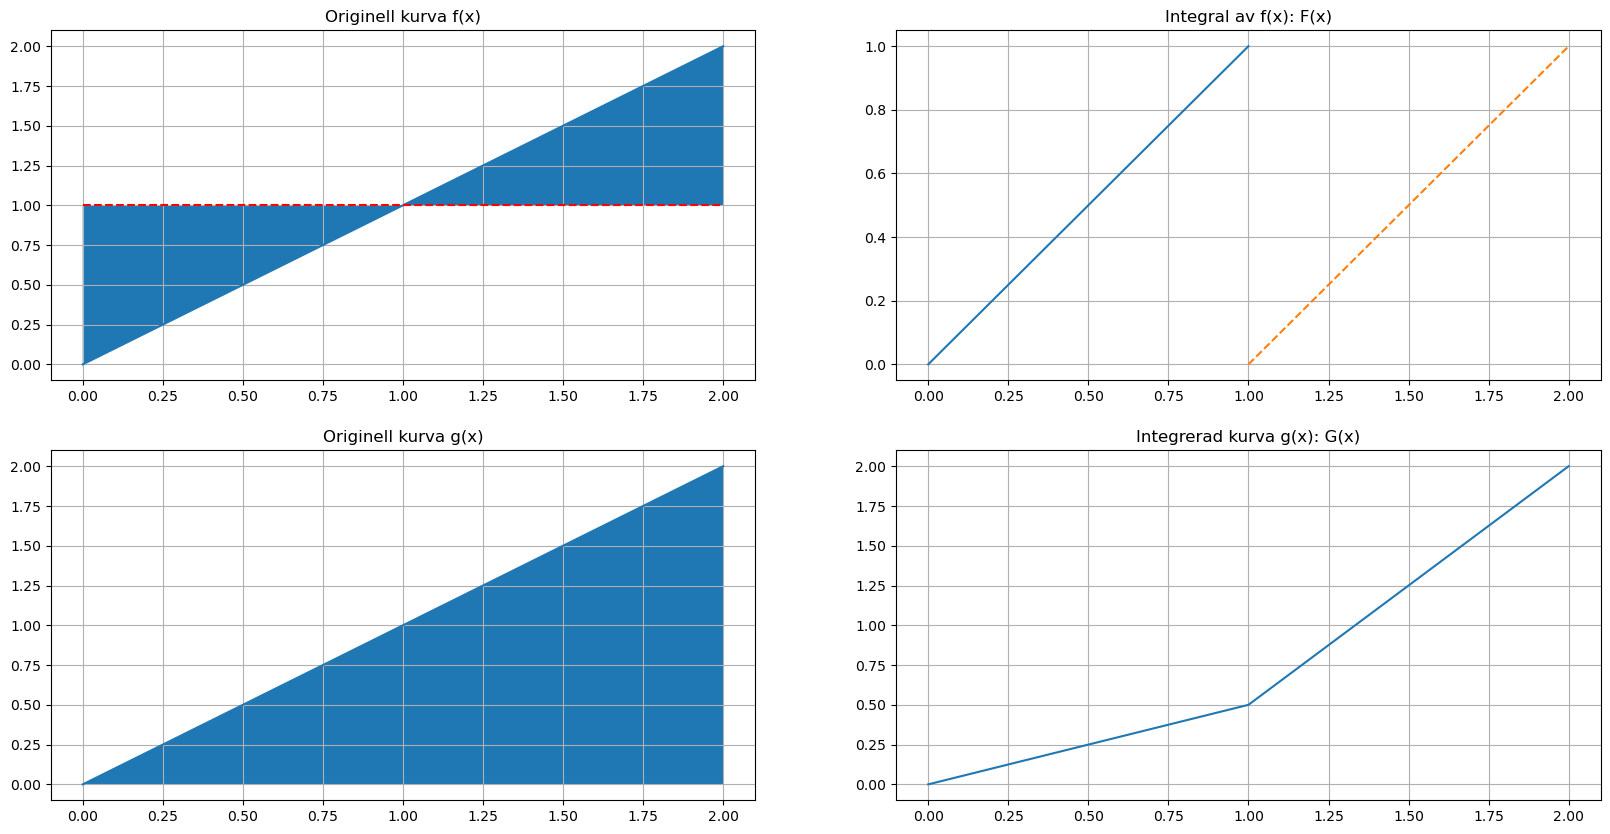

In [49]:
x_line= [0,1,2]
y_line= [0,1,2]

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0, 0].plot(x_line,y_line)
axs[0, 0].grid()
axs[0, 0].hlines(y=1,xmin=0, xmax=2, linestyles='dashed', colors='red')
axs[0, 0].fill_between(x_line,y_line, 1)
axs[0, 0].set_title("Originell kurva f(x)")

integralFirst = cumulative_trapezoid([1,1],[0,1],initial=0)
integralSecond = cumulative_trapezoid([1,1],[1,2],initial=0)

axs[0, 1].plot([0,1],integralFirst)
axs[0, 1].plot([1,2],integralSecond, linestyle='dashed')
axs[0, 1].grid()
axs[0, 1].set_title("Integral av f(x): F(x)")


axs[1, 0].plot(x_line,y_line)
axs[1, 0].grid()
axs[1, 0].fill_between(x_line,y_line, 0)
axs[1, 0].set_title("Originell kurva g(x)")


integral2 = cumulative_trapezoid(y_line,x_line,initial=0, )
axs[1, 1].plot(x_line,integral2)
axs[1, 1].grid()
axs[1, 1].set_title("Integrerad kurva g(x): G(x)")

plt.show()

#############################
#############################
#############################
#############################
#############################

# Första integralen är inte korrekt!!!!

#############################
#############################
#############################
#############################
#############################



False


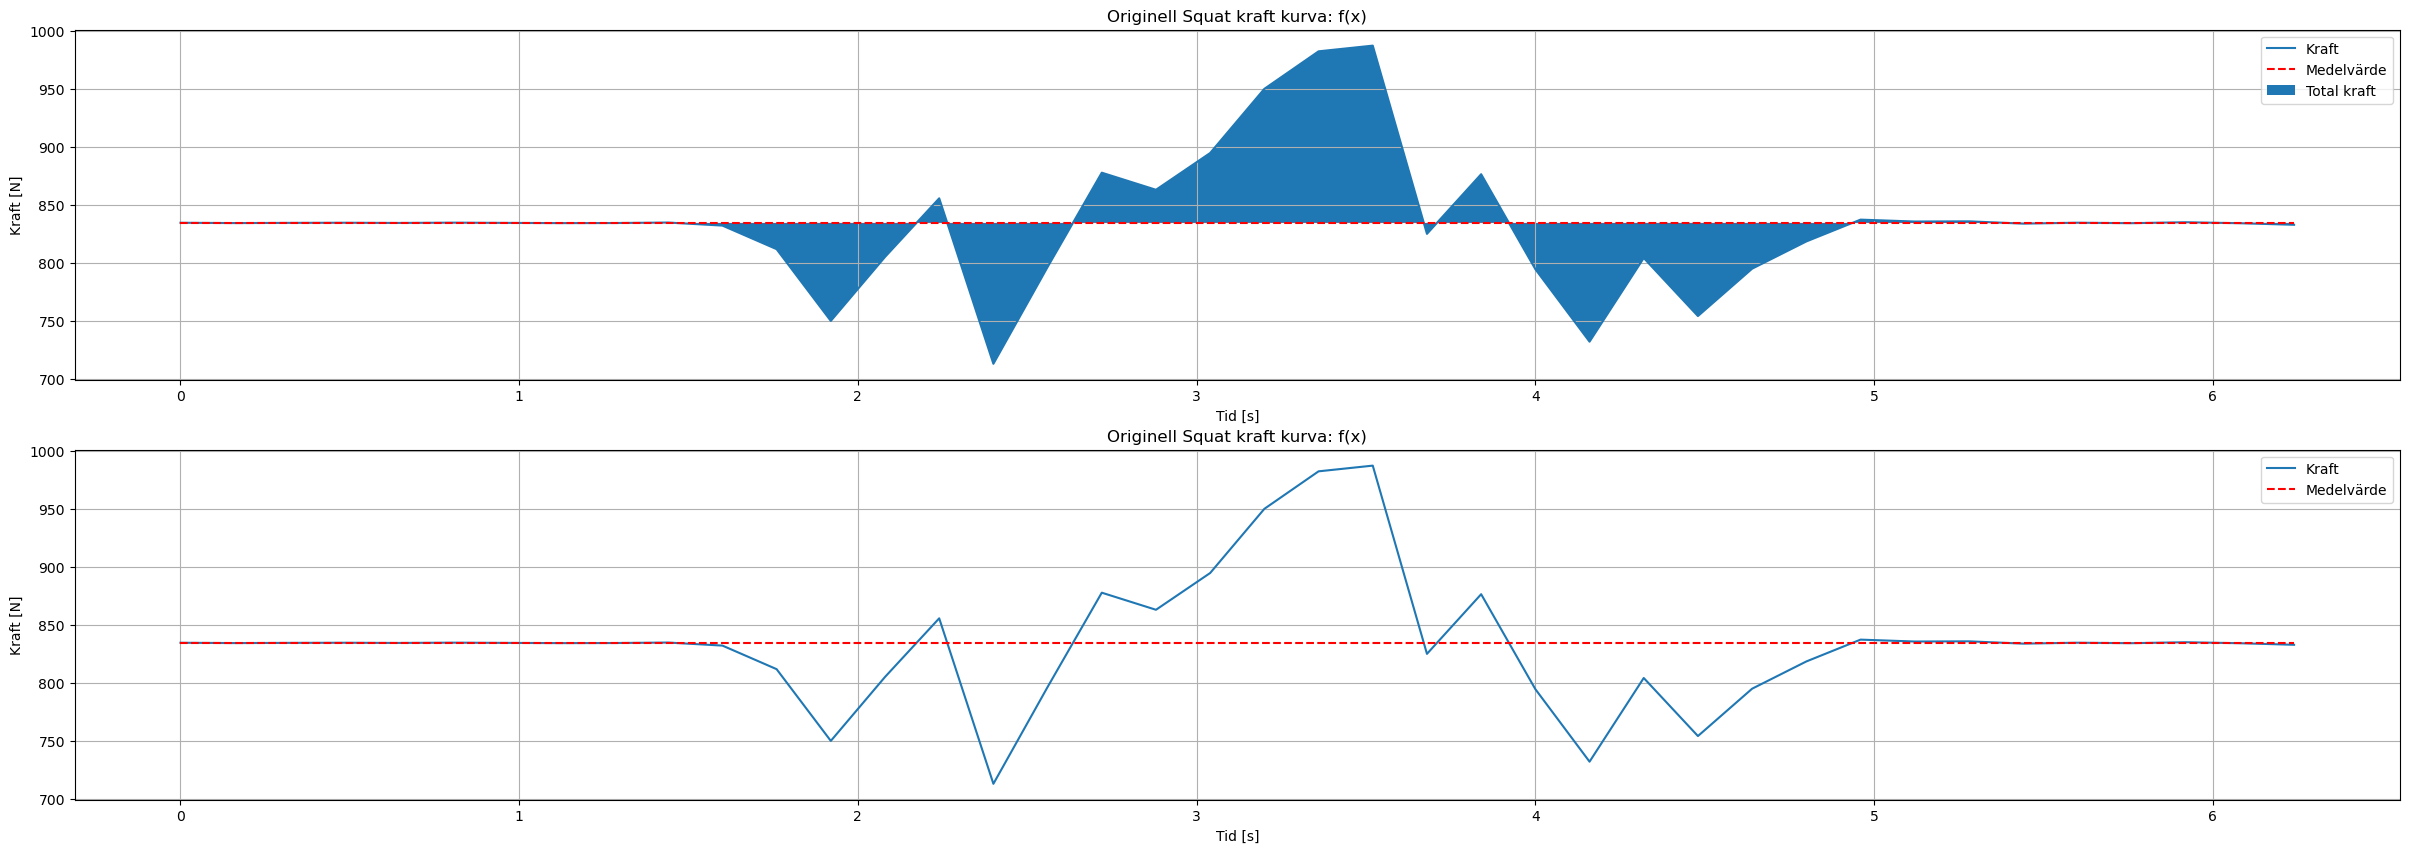

In [39]:

snippetOfGraph = unityDF[0:40]
horizontalLine = np.arange(0, snippetOfGraph.shape[0])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,10))

ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft")
ax1.legend()
ax1.set_title("Originell Squat kraft kurva: f(x)")
ax1.grid()

ax2.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax2.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Kraft [N]")
ax2.legend()
ax2.grid()
ax2.set_title("Originell Squat kraft kurva: f(x)")

i = 0
mean = snippetOfGraph['force'].mean()
while(i < snippetOfGraph.shape[0]):
    if(snippetOfGraph['force'][i] == mean):
        ax2.plot(snippetOfGraph['time'][i],snippetOfGraph['force'][i], marker="X")
    i = i + 1
print(snippetOfGraph['force'][0]==mean)
y_filler=np.full((snippetOfGraph.shape[0]),snippetOfGraph['force'].mean())
integralOfSnippet = cumulative_trapezoid(y_filler,snippetOfGraph['force'],initial=0)

##Hitta indices och beräkna area därimellan
##https://stackoverflow.com/questions/28766692/how-to-find-the-intersection-of-two-graphs




#print(integralOfSnippet)
#ax3.plot(snippetOfGraph['time'], integralOfSnippet)
#ax3.grid()
#ax3.set_title("Integral av f(x): F(x)")

plt.show()

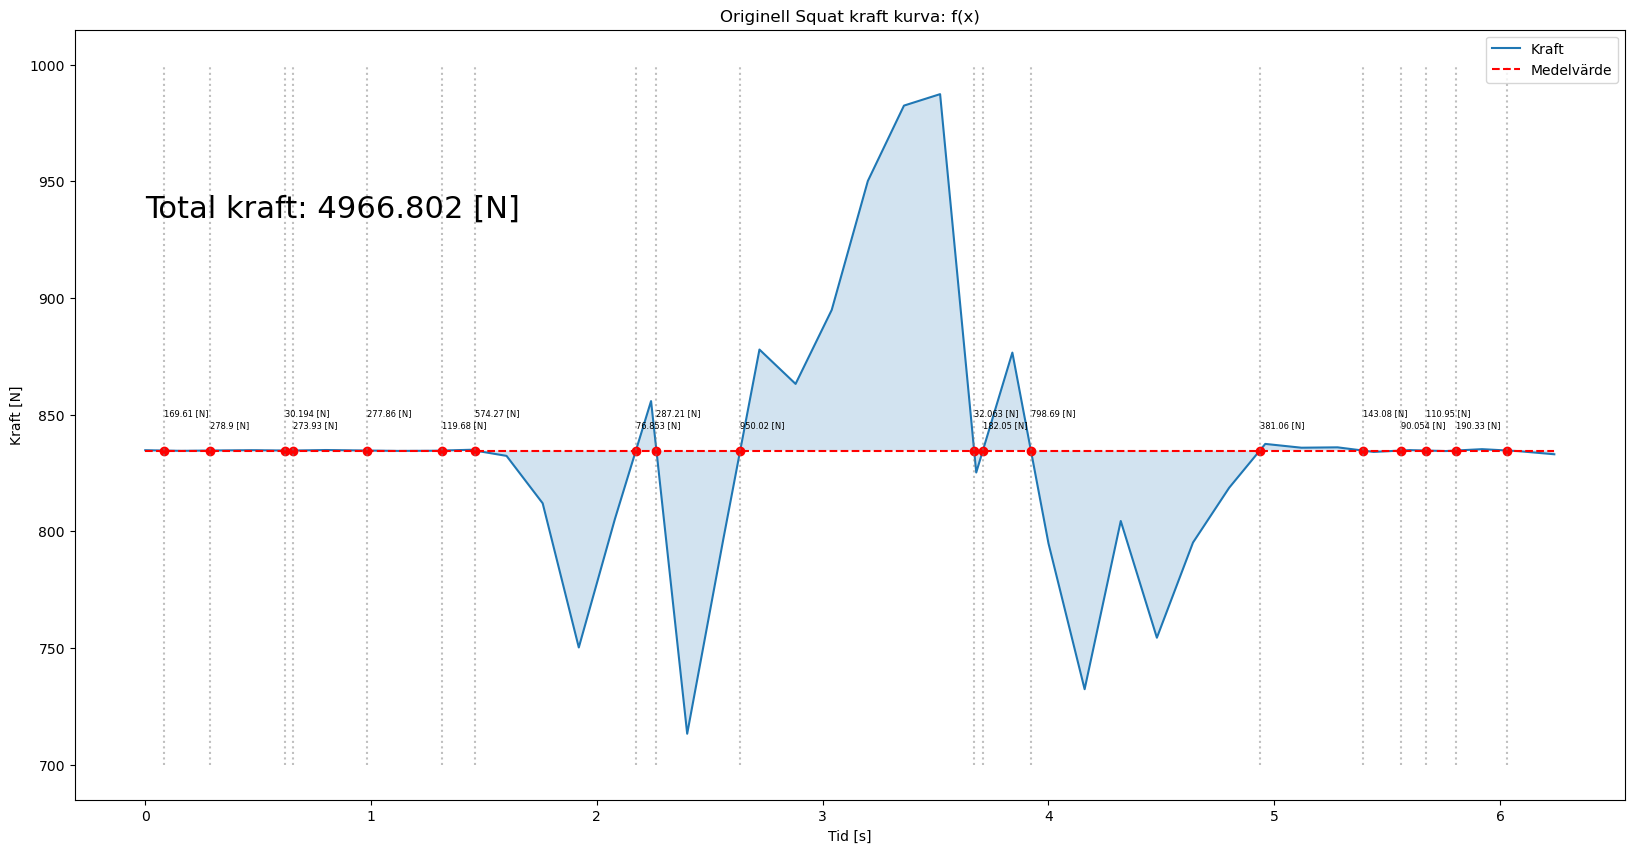

In [61]:
import numpy as np
import matplotlib.pyplot as plt

snippetOfGraph = unityDF[0:40]

fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.legend()
#ax1.grid()
ax1.set_title("Originell Squat kraft kurva: f(x)")


from shapely.geometry import LineString

meanArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].mean())

line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
line_2 = LineString(np.column_stack((meanArr,snippetOfGraph['time'])))

intersection = line_1.intersection(line_2)

intersection.geoms

time = []
force = []
for geom in intersection.geoms:
    time.append(geom.y)
    force.append(geom.x)
 
#ax1.plot(time, force, 'ro')
#ax1.vlines(ymax=1000, ymin=700, x=time, linestyles="dotted", colors="gray", alpha=0.5)
#ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
#ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


# Sortera time och force listorna.
sortedTime = []

sortedForce = []

i = 0


while(len(time) != 0):
    i = time.index(min(time))
    sortedTime.append(min(time))    
    sortedForce.append(force[i])
    
    time.pop(i)
    force.pop(i)
    
ax1.plot(sortedTime, sortedForce, 'ro')
ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.5)
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
#ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


# Integrera mellan de givna punkterna
sumForce = 0
pos = 0
spacer = 1
while(pos < len(sortedTime)):
    # Skapa scliecs av force och time variablerna
    if(pos == len(sortedTime)-1):
        break
    
    timeSlice = []
    forceSlice = []
    
    # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
    timeSlice.append(sortedTime[pos])
    forceSlice.append(sortedForce[pos])



    # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
    i = 0
    while(True):
        # Lägg till de värden som kommer imellan de två 'intersections' som finns.
        if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
            i = i + 1
            continue
        if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
            break

        timeSlice.append(snippetOfGraph['time'][i])
        forceSlice.append(snippetOfGraph['force'][i])
        i = i + 1
        
    
    timeSlice.append(sortedTime[pos+1])
    forceSlice.append(sortedForce[pos+1])
    
    #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
    

    # Utför en integral med cumulative_trapezoid    
    sliceIntegral = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
    #print(f"Integral values: {sliceIntegral}")
    #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


    # Ta det sista värdet i arreyen som funktionen returnarar.
    # Som sist addera integralvärdet till en summa.
    ax1.text(sortedTime[pos], snippetOfGraph['force'].mean() + 10 + 5 * spacer, f'{sliceIntegral[len(sliceIntegral)-1]:.5} [N]', fontsize = 6)
    sumForce = sumForce + sliceIntegral[len(sliceIntegral)-1]
    if(spacer == 1):
        spacer = 0
    else:
        spacer = 1
        
    # Gå till nästa punkt.
    pos = pos + 1

ax1.text(0, snippetOfGraph['force'].mean() + 100, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)


plt.show()



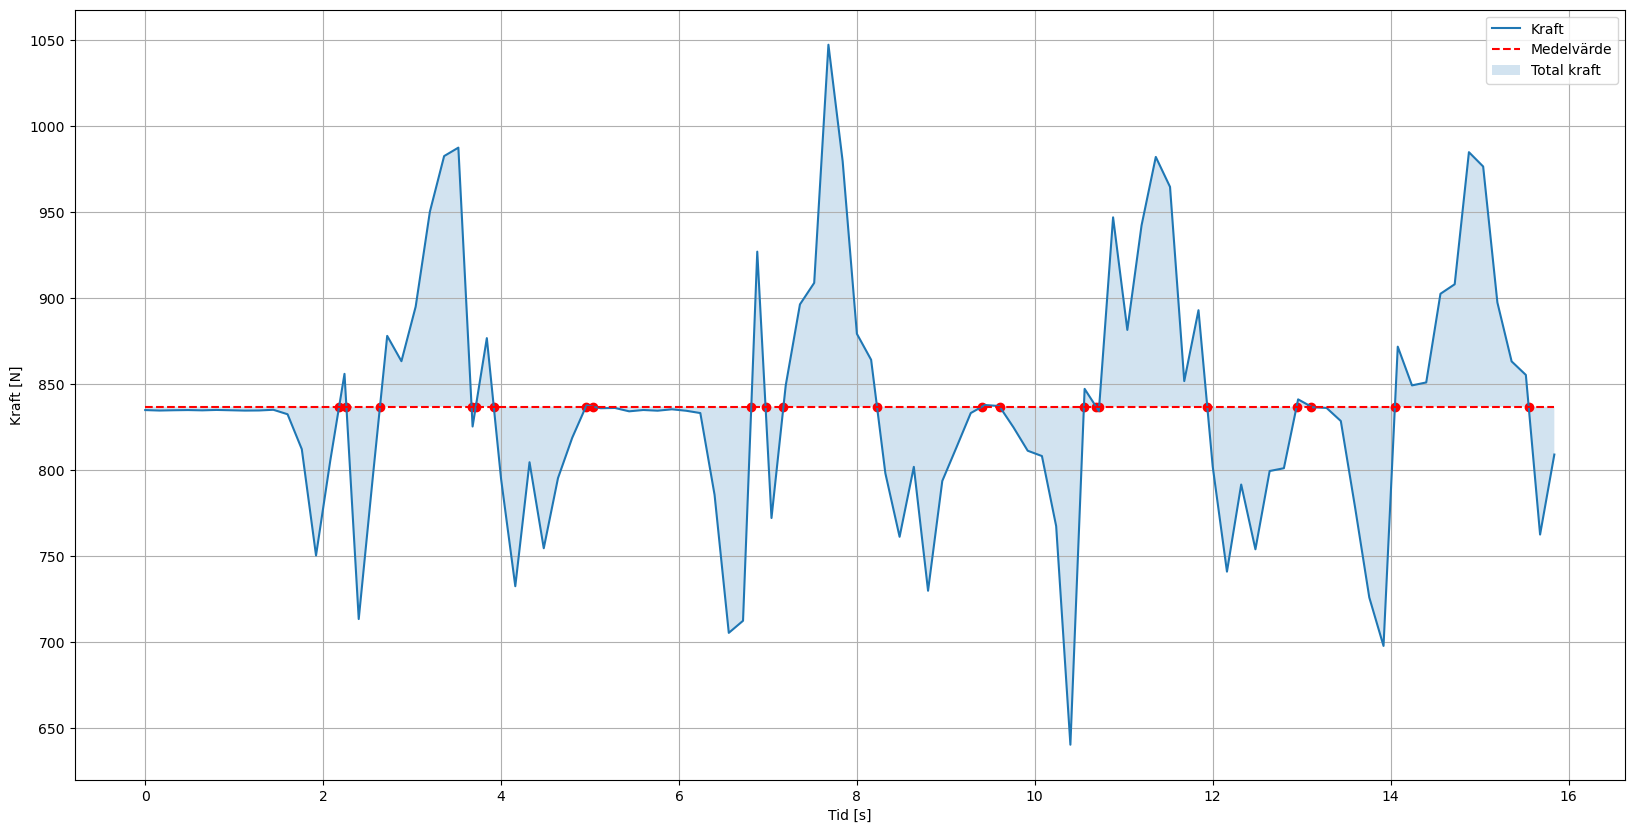

In [75]:

snippetOfGraph = unityDF[0:100]

fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

meanArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].mean())

line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
line_2 = LineString(np.column_stack((meanArr,snippetOfGraph['time'])))

intersection = line_1.intersection(line_2)

#intersection.geoms
time = []
force = []
for geom in intersection.geoms:
    time.append(geom.y)
    force.append(geom.x)
 
ax1.plot(time, force, 'ro')


ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
ax1.legend()
ax1.grid()

plt.show()

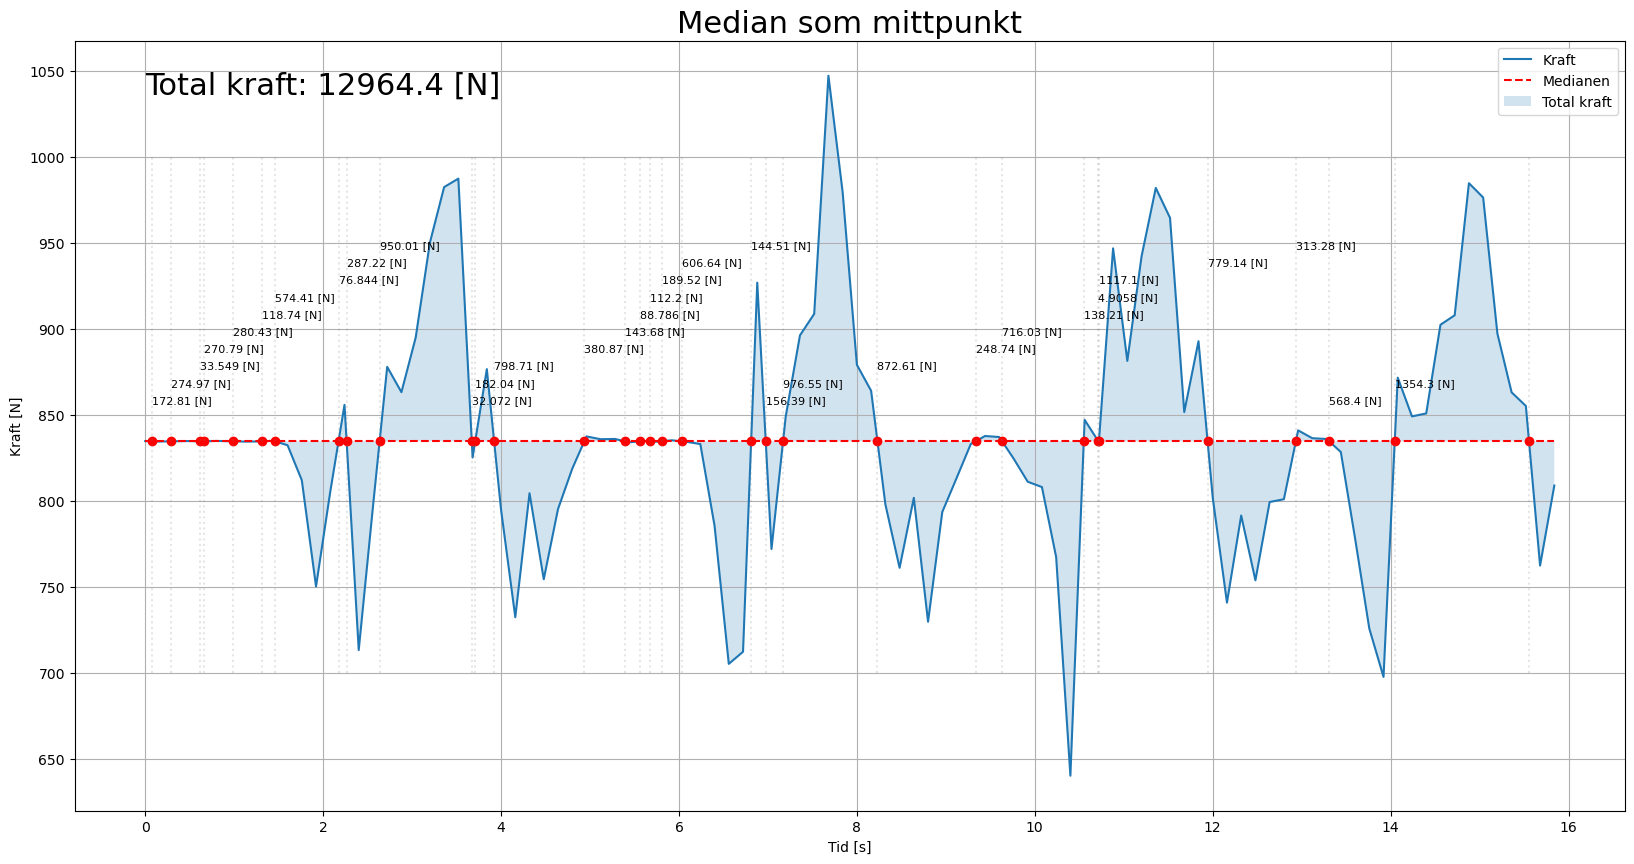

In [90]:

snippetOfGraph = unityDF[0:100]

fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())


line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

intersection = line_1.intersection(line_2)

#intersection.geoms
time = []
force = []
for geom in intersection.geoms:
    time.append(geom.y)
    force.append(geom.x)


## Bytte mittenlinjen till median istället för mean för att testa
ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medianen")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
ax1.legend()
ax1.grid()
ax1.set_title("Median som mittpunkt", fontsize=22)



# Sortera time och force listorna.
sortedTime = []

sortedForce = []

i = 0


while(len(time) != 0):
    i = time.index(min(time))
    sortedTime.append(min(time))    
    sortedForce.append(force[i])
    
    time.pop(i)
    force.pop(i)
    
ax1.plot(sortedTime, sortedForce, 'ro')
ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.2)
#ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


# Integrera mellan de givna punkterna
sumForce = 0
pos = 0
spacer = 1
while(pos < len(sortedTime)):
    # Skapa scliecs av force och time variablerna
    if(pos == len(sortedTime)-1):
        break
    
    timeSlice = []
    forceSlice = []
    
    # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
    timeSlice.append(sortedTime[pos])
    forceSlice.append(sortedForce[pos])



    # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
    i = 0
    while(True):
        # Lägg till de värden som kommer imellan de två 'intersections' som finns.
        if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
            i = i + 1
            continue
        if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
            break

        timeSlice.append(snippetOfGraph['time'][i])
        forceSlice.append(snippetOfGraph['force'][i])
        i = i + 1
        
    
    timeSlice.append(sortedTime[pos+1])
    forceSlice.append(sortedForce[pos+1])
    
    #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
    

    # Utför en integral med cumulative_trapezoid    
    sliceIntegral = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
    #print(f"Integral values: {sliceIntegral}")
    #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


    # Ta det sista värdet i arreyen som funktionen returnarar.
    # Som sist addera integralvärdet till en summa.
    ax1.text(sortedTime[pos], snippetOfGraph['force'].mean() + 10 + 10 * spacer, f'{sliceIntegral[len(sliceIntegral)-1]:.5} [N]', fontsize = 8)
    sumForce = sumForce + sliceIntegral[len(sliceIntegral)-1]
    
    if(spacer%10 == 0):
        spacer = 1
    else:
        spacer = spacer + 1
        
    # Gå till nästa punkt.
    pos = pos + 1

ax1.text(0, snippetOfGraph['force'].mean() + 200, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)


plt.show()


